# Entregable Aprendizaje No Supervisado
---

*Grupo 9*
* *Bosch, María Candelaria*
* *Juarez, Manuel*
* *Mecchia, Martín*
* *Montironi, Sebastian*


---

# Consignas

Práctico entregable:
Utilizar la base de jugadores “female_players.csv” disponible en la página de Kaggle https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset . Consideren que en comparación con la base vista en clase, esta base no tiene los mismos jugadores (ahora mujeres 2023) y no tiene exactamente el mismo formato (a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde).

Con la nueva base, realizar el siguiente análisis. Notar que es más completo pero análogo al que realizamos con los datos FIFA2019 en el cursado de la materia. Realice comentarios en cada parte (verbose=True ;))

1- Análisis exploratorio inicial de la base.


2- Evaluación visual e intuitiva de a dos variables numéricas por vez. Sugerencia: hagan los scatterplots de las combinaciones de dos variables que tengan algún sentido para ustedes, porque todas las combinaciones de variables son muchas y no van a poder analizarlas como merecen.


3- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?


4- Aplicación de clustering para encontrar grupos de jugadoras con habilidades equivalentes, por ejemplo, jugadoras que podrían intercambiarse en el caso de una lesión o cuando una jugadora está cansada. Para esto utilice como mínimo dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Justifiquen por qué eligen los diferentes hiper-parámetros que se puedan elegir según el método: número de clusters, medida de distancia, criterio de aglomeración…


5- Análisis cualitativo de los clusters encontrados. ¿Qué hay en cada cluster? ¿Son efectivamente equivalentes las jugadoras de un cluster, es decir, podrían cumplir el mismo rol en un equipo? Si se trata de clusters heterogéneos, ¿por qué razón pueden haber sido agrupadas las jugadoras del cluster? ¿Qué motiva las diferencias en tamaño?


6- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

---

*3- *Se realizó un escalamiento estándar StandardScaler de las características de tal manera que tengan una media igual a cero y una desviación estándar igual a uno. La normalización es importante en PCA ya que es un análisis que maximiza la varianza.*

*4- GMM:*
*tipo de matriz de varianza covarianza:  *
* 'full' (each component has its own general covariance matrix),
* 'tied' (all components share the same general covariance matrix),
* 'diag' (each component has its own diagonal covariance matrix),
* 'spherical' (each component has its own single variance).


*DBSCAN*
*numero de muestras= The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.*
*eps: distancia para encontrar otra observación cercana (NEIGHBORHOOD)*

*KMEANS*
*k: numero de clusters*

5 - ---
*Los clusters podrían agrupar a las jugadoras en función de sus habilidades y roles en la cancha. Acá una intuición posible:*

1. *Cluster de Delanteras: Este cluster podría incluir a jugadoras con habilidades altas en disparo, velocidad, dribbling y finalización. Estas jugadoras podrían ser delanteras o extremos que se destacan en hacer goles y crear oportunidades de ataque.*

2. *Cluster de Mediocampistas Creativas: En este cluster podrían estar jugadoras con buenas habilidades en pases, visión de juego y manejo de pelota. Estas jugadoras podrían cumplir el rol de volantes creativas (enganches) que se encargan de distribuir la pelota y crear oportunidades de gol para el equipo.*

3. *Cluster de Defensoras: Este cluster podría incluir a jugadoras con habilidades en defensa, como marcaje, quite y agresividad. Estas jugadoras podrían ser defensoras centrales o laterales que se especializan en parar los ataques rivales.*

4. *Cluster de Arqueras: En este cluster podrían estar las arqueras con habilidades destacadas en el juego aéreo, reflejos y posicionamiento. Estas jugadoras son las responsables de mantener el arco en cero.*

*En esta ocación la división entre clusters es bastante clara, sin embargo, si usamos distintos parámetros, pueden surgir clusters heterogéneos debido a múltiples razones:*

1. *Jugadoras Polivalentes: Algunas jugadoras pueden tener habilidades equilibradas en varias áreas y podrían terminar en clusters heterogéneos debido a su versatilidad en diferentes posiciones.*

2. *Muestras Limitadas: Si la base de datos es limitada en tamaño, algunas diferencias sutiles entre las jugadoras podrían no ser capturadas adecuadamente, lo que podría llevar a la formación de clusters heterogéneos.*

*En cuanto a las diferencias en el tamaño de los clusters, esto podría deberse a la distribución de habilidades en la población de jugadoras. Algunos clusters podrían agrupar a jugadoras con habilidades más comunes o equilibradas, lo que resulta en un mayor número de jugadoras en esos clusters. Por otro lado, clusters que agrupan a jugadoras con habilidades más especializadas podrían ser más pequeños debido a la menor frecuencia de jugadoras con esas características específicas.*
---

## Agrupamiento con el FIFA 2023 dataset

Utilizamos la base de jugadores “female_players.csv” disponible en la página de Kaggle https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset

## Inicialización del entorno

**Empezamos cargando algunas herramientas para cargar los datos y manipularlos.**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

**Para visualización usaremos principalmente plotly, también seaborn y matplotlib.**

In [2]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

**Leemos el dataset**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving female_players.csv to female_players.csv


In [4]:
df=pd.read_csv('female_players.csv')
df.head(5)

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,134500000.0,4000.0,28,1993-09-10,168,66,2216.0,Women's Super League,1.0,116010.0,Chelsea W,ST,20.0,NaN,2020-01-01,2024.0,195,Australia,NaN,NaN,NaN,Right,4,4,5,High/High,Normal (170-),Yes,275700000.0,"#Aerial Threat, #Dribbler, #Engine, #Distance ...","Solid Player, Leadership, Finesse Shot, Speed ...",87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,...,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,86+3,86+3,86+3,85+3,78+3,78+3,78+3,85+3,64+3,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,89500000.0,3000.0,31,1990-07-20,187,70,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,LCB,3.0,NaN,2006-07-01,2026.0,18,France,113003.0,LCB,3.0,Right,3,2,5,High/Medium,Lean (185+),Yes,183500000.0,"#Aerial Threat, #Tackling, #Tactician, #Streng...","Leadership, Long Passer (AI), Power Header, Te...",63.0,72.0,71.0,72.0,93.0,87.0,51,70,96,...,90,34,85,86,75,93,65,88,90,70,59,75,84.0,93,94,91,7,14,17,11,15,NaN,78+3,78+3,78+3,71,75,75,75,71,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,80+3,87+3,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,ST,90,90,NaN,NaN,32,1989-07-02,168,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,United States,113009.0,ST,13.0,Left,4,4,5,High/Low,Unique,Yes,NaN,#Clinical Finisher,"Leadership, Finesse Shot, Flair, Speed Dribble...",89.0,91.0,80.0,88.0,47.0,77.0,71,95,86,...,84,67,90,81,87,81,83,53,46,92,75,88,92.0,41,43,39,11,11,10,10,11,NaN,90,90,90,87,89,89,89,87,87+3,87+3,87+3,86+3,82+3,82+3,82+3,86+3,69+3,67+3,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,90,91,143000000.0,3000.0,26,1995-07-10,176,68,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,RES,14.0,NaN,2014-07-01,2024.0,36,Norway,113007.0,ST,14.0,Right,4,4,5,High/Medium,Normal (170-185),Yes,303900000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Leadership, Outside Foot Shot, Technical Dribb...",83.0,91.0,77.0,87.0,39.0,77.0,71,94,93,...,92,47,86,89,75,81,89,65,23,96,76,86,86.0,42,33,30,15,7,12,10,14,NaN,90+1,90+1,90+1,87,89,89,89,87,87+3,87+3,87+3,85+3,78+3,78+3,78+3,85+3,63+3,61+3,61+3,61+3,63+3,60+3,56+3,56+3,56+3,60+3,20+3,https://cdn.sofifa.net/players/227/310/23_120.png
4,227246,/player/227246/lucy-bronze/230009,23,9,2023-01-13,L. Bronze,Lucia Roberta Tough Bronze,RB,89,89,NaN,NaN,30,1991-10-28,171,6

In [5]:
df.shape

(181361, 110)

In [6]:
df.fifa_version.unique()

array([23, 22, 21, 20, 19, 18, 17, 16])

In [7]:
df.fifa_version.sort_values

<bound method Series.sort_values of 0         23
1         23
2         23
3         23
4         23
          ..
181356    16
181357    16
181358    16
181359    16
181360    16
Name: fifa_version, Length: 181361, dtype: int64>

In [8]:
#filtro la ultima version del fifa
df23 = df[df['fifa_version'] == 23]
df23.shape

(7425, 110)

**Observamos las actualizaciones**

In [9]:
df23.fifa_update.unique()

array([9, 8, 7, 6, 5, 4, 3, 2, 1])

In [10]:
df23.fifa_update.sort_values

<bound method Series.sort_values of 0       9
1       9
2       9
3       9
4       9
       ..
7420    1
7421    1
7422    1
7423    1
7424    1
Name: fifa_update, Length: 7425, dtype: int64>

In [11]:
#filtro la ultima acualizacion del fifa
df23_V09 = df23[df23['fifa_update'] == 9]
df23_V09.shape

(832, 110)

In [12]:
df23_V09.head(5)

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,134500000.0,4000.0,28,1993-09-10,168,66,2216.0,Women's Super League,1.0,116010.0,Chelsea W,ST,20.0,NaN,2020-01-01,2024.0,195,Australia,NaN,NaN,NaN,Right,4,4,5,High/High,Normal (170-),Yes,275700000.0,"#Aerial Threat, #Dribbler, #Engine, #Distance ...","Solid Player, Leadership, Finesse Shot, Speed ...",87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,...,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,86+3,86+3,86+3,85+3,78+3,78+3,78+3,85+3,64+3,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,89500000.0,3000.0,31,1990-07-20,187,70,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,LCB,3.0,NaN,2006-07-01,2026.0,18,France,113003.0,LCB,3.0,Right,3,2,5,High/Medium,Lean (185+),Yes,183500000.0,"#Aerial Threat, #Tackling, #Tactician, #Streng...","Leadership, Long Passer (AI), Power Header, Te...",63.0,72.0,71.0,72.0,93.0,87.0,51,70,96,...,90,34,85,86,75,93,65,88,90,70,59,75,84.0,93,94,91,7,14,17,11,15,NaN,78+3,78+3,78+3,71,75,75,75,71,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,80+3,87+3,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,ST,90,90,NaN,NaN,32,1989-07-02,168,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,United States,113009.0,ST,13.0,Left,4,4,5,High/Low,Unique,Yes,NaN,#Clinical Finisher,"Leadership, Finesse Shot, Flair, Speed Dribble...",89.0,91.0,80.0,88.0,47.0,77.0,71,95,86,...,84,67,90,81,87,81,83,53,46,92,75,88,92.0,41,43,39,11,11,10,10,11,NaN,90,90,90,87,89,89,89,87,87+3,87+3,87+3,86+3,82+3,82+3,82+3,86+3,69+3,67+3,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,90,91,143000000.0,3000.0,26,1995-07-10,176,68,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,RES,14.0,NaN,2014-07-01,2024.0,36,Norway,113007.0,ST,14.0,Right,4,4,5,High/Medium,Normal (170-185),Yes,303900000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Leadership, Outside Foot Shot, Technical Dribb...",83.0,91.0,77.0,87.0,39.0,77.0,71,94,93,...,92,47,86,89,75,81,89,65,23,96,76,86,86.0,42,33,30,15,7,12,10,14,NaN,90+1,90+1,90+1,87,89,89,89,87,87+3,87+3,87+3,85+3,78+3,78+3,78+3,85+3,63+3,61+3,61+3,61+3,63+3,60+3,56+3,56+3,56+3,60+3,20+3,https://cdn.sofifa.net/players/227/310/23_120.png
4,227246,/player/227246/lucy-bronze/230009,23,9,2023-01-13,L. Bronze,Lucia Roberta Tough Bronze,RB,89,89,NaN,NaN,30,1991-10-28,171,6

In [13]:
df23_V09.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 832 entries, 0 to 831
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 721.5+ KB


## Exploración de la base

---

*Usamos el dataframe filtrado en el paso anterior y observamos las variables que tenemos. De ahora en más para simplificar lo llamaremos data*

---

In [14]:
data=df23_V09.copy()

In [15]:
print(data.columns)
print(len(data.columns), 'variables')

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_face_url'],
      dtype='object', length=110)
110 variables


In [16]:
data.columns.to_list()

['player_id',
 'player_url',
 'fifa_version',
 'fifa_update',
 'fifa_update_date',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'league_id',
 'league_name',
 'league_level',
 'club_team_id',
 'club_name',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined_date',
 'club_contract_valid_until_year',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_bal

In [17]:
print(data.describe())

           player_id  fifa_version  fifa_update     overall   potential  \
count     832.000000         832.0        832.0  832.000000  832.000000   
mean   255487.716346          23.0          9.0   75.108173   79.725962   
std     15171.261695           0.0          0.0    6.223308    5.510685   
min    226177.000000          23.0          9.0   57.000000   63.000000   
25%    245190.500000          23.0          9.0   71.000000   76.000000   
50%    264918.000000          23.0          9.0   75.000000   80.000000   
75%    266452.500000          23.0          9.0   80.000000   84.000000   
max    273050.000000          23.0          9.0   91.000000   94.000000   

          value_eur     wage_eur        age   height_cm   weight_kg  \
count  5.390000e+02   539.000000  832.00000  832.000000  832.000000   
mean   1.600459e+07   802.782931   25.44351  168.679087   60.811298   
std    2.280406e+07   439.955696    4.50716    6.168836    5.361468   
min    3.500000e+05   500.000000   17.00

---

*Nos fijamos qué columnas presentan datos faltantes*

---

Text(0.5, 1.0, 'Cantidad de valores no nulos de cada columna - Fifa dataset')

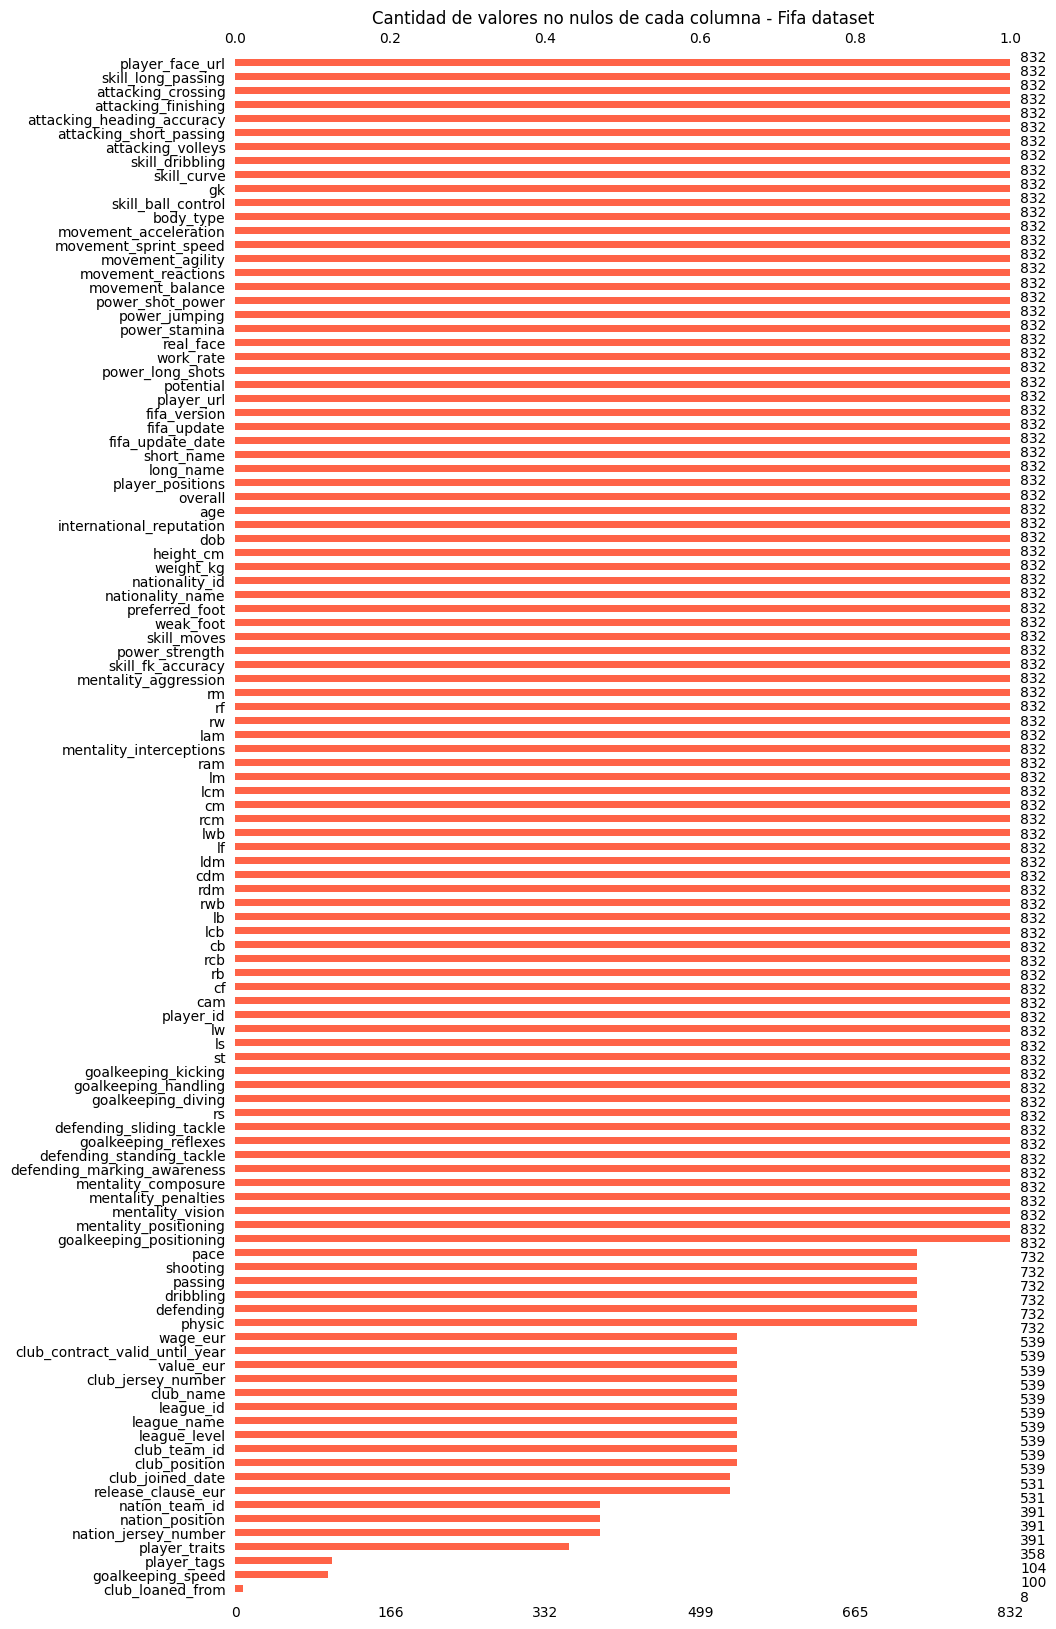

In [18]:
import missingno as msno
msno.bar(data,figsize=(10, 20), sort="ascending",fontsize=10, color='tomato')
plt.title('Cantidad de valores no nulos de cada columna - Fifa dataset')

Text(0.5, 1.0, 'Matriz  de valores faltantes por variable segun index - Fifa dataset')

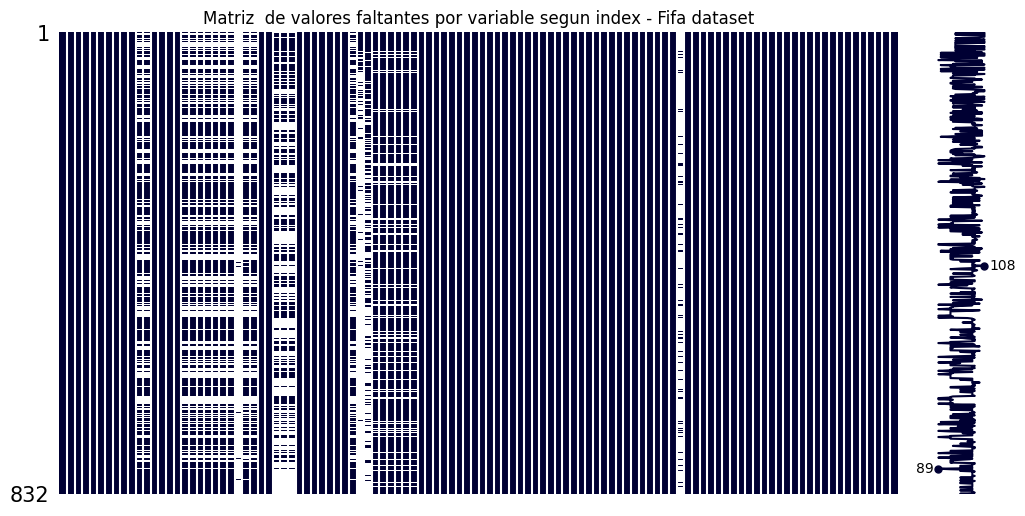

In [19]:
msno.matrix(data,figsize=(12, 6), fontsize=12, color=[0,0,0.2])
plt.title('Matriz  de valores faltantes por variable segun index - Fifa dataset')

---

*Analizando las categorías podemos observar que los datos faltantes se deben a que no todas las características se aplican a todas las jugadoras*

---

In [20]:
data.to_csv('female_players_filtered.csv', index=False)

In [21]:
#exportamos el dataframe filtrado
data.to_csv('female_players_filtered.csv')
files.download('female_players_filtered.csv')

data.tail(3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
829,271849,/player/271849/chelsea-ferguson/230009,23,9,2023-01-13,C. Ferguson,Chelsea Ferguson,ST,57,79,525000.0,500.0,17,2004-11-06,167,60,2216.0,Women's Super League,1.0,116013.0,Brighton & Hove Albion W,RES,24.0,NaN,2022-08-01,2023.0,14,England,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Normal (170-),No,1600000.0,NaN,NaN,55.0,53.0,43.0,56.0,24.0,58.0,32,54,60,...,50,65,55,65,55,63,50,45,17,62,35,41,53.0,18,22,21,8,6,8,9,11,NaN,57+2,57+2,57+2,52,55,55,55,52,52+2,52+2,52+2,52+2,47+2,47+2,47+2,52+2,39+2,38+2,38+2,38+2,39+2,37+2,37+2,37+2,37+2,37+2,13+2,https://cdn.sofifa.net/players/271/849/23_120.png
830,271898,/player/271898/clara-wibaut/230009,23,9,2023-01-13,C. Wibaut,Clara Wibaut,GK,57,75,350000.0,500.0,17,2005-05-27,172,60,2218.0,Feminine Division 1,1.0,116040.0,Stade de Reims W,SUB,40.0,NaN,2022-09-22,2024.0,18,France,NaN,NaN,NaN,Right,2,1,1,Medium/Medium,Lean (170-185),No,954000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,8,13,...,49,45,44,52,27,37,8,21,13,7,38,13,23.0,10,11,12,63,59,58,48,59,37.0,20+2,20+2,20+2,20,21,21,21,20,21+2,21+2,21+2,21+2,21+2,21+2,21+2,21+2,20+2,20+2,20+2,20+2,20+2,20+2,19+2,19+2,19+2,20+2,56+2,https://cdn.sofifa.net/players/271/898/23_120.png
831,272541,/player/272541/lulu-jarvis/230009,23,9,2023-01-13,L. Jarvis,Lulu Jarvis,CM,57,78,525000.0,500.0,18,2004-05-06,165,57,2216.0,Women's Super League,1.0,116013.0,Brighton & Hove Albion W,SUB,23.0,NaN,2022-08-01,2024.0,14,England,NaN,NaN,NaN,Right,3,2,1,Medium/Medium,Lean (170-),No,1600000.0,NaN,NaN,69.0,48.0,55.0,61.0,49.0,50.0,47,49,51,...,52,73,41,58,54,52,51,38,54,52,54,50,51.0,39,58,43,7,14,6,11,11,NaN,53+2,53+2,53+2,57,56,56,56,57,58+2,58+2,58+2,57+2,57+2,57+2,57+2,57+2,54+2,54+2,54+2,54+2,54+2,54+2,51+2,51+2,51+2,54+2,15+2,https://cdn.sofifa.net/players/272/541/23_120.png


---
Renombramos las posiciones de lo jugadores en una nueva columna

---

In [22]:
# Definir diccionario de mapeo de categorías
category_mapping = {
    'RF': 'forwards',
    'ST': 'forwards',
    'LW': 'forwards',
    'LF': 'forwards',
    'RS': 'forwards',
    'LS': 'forwards',
    'RM': 'forwards',
    'LM': 'forwards',
    'RW': 'forwards',
    'RCM': 'midfielders',
    'LCM': 'midfielders',
    'LDM': 'midfielders',
    'CAM': 'midfielders',
    'CDM': 'midfielders',
    'LAM': 'midfielders',
    'RDM': 'midfielders',
    'CM': 'midfielders',
    'RAM': 'midfielders',
    'CF': 'midfielders',
    'RCB': 'defenders',
    'CB': 'defenders',
    'LCB': 'defenders',
    'LB': 'defenders',
    'RB': 'defenders',
    'RWB': 'defenders',
    'LWB': 'defenders',
    'GK': 'goalkeepers'
}

# Función para mapear las categorías
def map_categories(positions):
    if isinstance(positions, str):
        return [category_mapping[pos.strip()] for pos in positions.split(',')][0]
    else:
        return positions

## 2- Evaluación visual e intuitiva de a dos variables numéricas por vez.

---

*Visualizamos de a pares de variables según la categoría de la posición para inuir mejor los posibles clusters*

---

<Figure size 1200x1000 with 0 Axes>

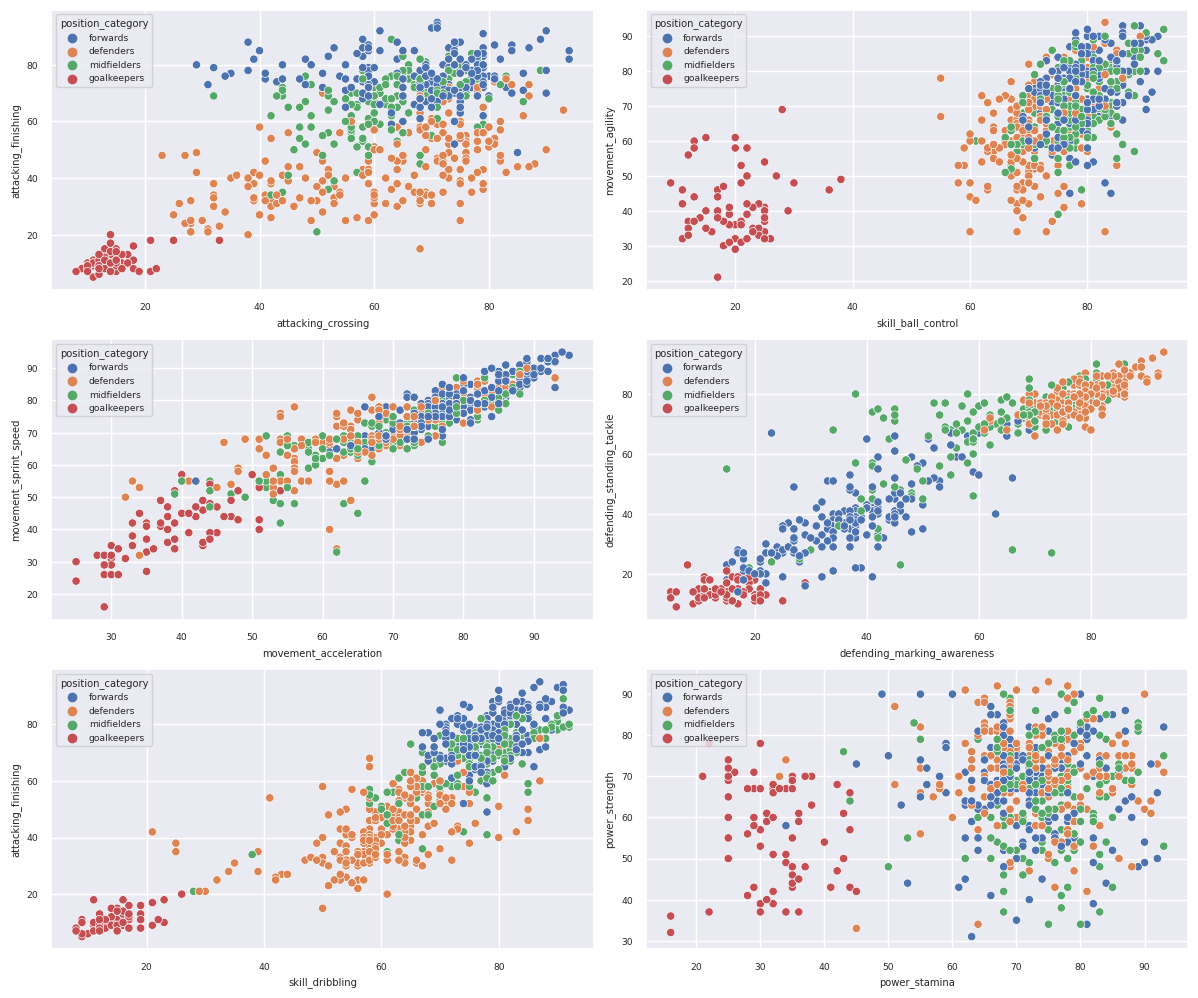

In [23]:
# Aplicar la función de mapeo a la columna 'player_positions' y crear una nueva columna 'position_category'
data['position_category'] = data['player_positions'].apply(map_categories)

data=data[(data['overall']>70)]

# Descomponer la columna 'position_category' en múltiples filas
data_exploded = data.explode('position_category')

sns.set(font_scale=0.6)
plt.figure(figsize=(12, 10))

# Crear una matriz de subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

sns.scatterplot(data=data_exploded, x='attacking_crossing', y='attacking_finishing', hue='position_category', ax=axes[0, 0])
sns.scatterplot(data=data_exploded, x='skill_ball_control', y='movement_agility', hue='position_category', ax=axes[0, 1])
sns.scatterplot(data=data_exploded, x='movement_acceleration', y='movement_sprint_speed', hue='position_category', ax=axes[1, 0])
sns.scatterplot(data=data_exploded, x='defending_marking_awareness', y='defending_standing_tackle', hue='position_category' , ax=axes[1, 1])
sns.scatterplot(data=data_exploded, x='skill_dribbling', y= 'attacking_finishing', hue= 'position_category', ax=axes[2, 0])
sns.scatterplot(data=data_exploded, x='power_stamina', y= 'power_strength', hue='position_category' , ax=axes[2, 1])

# Ajusta el espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

## Preparación de los datos a analizar

In [24]:
n=10000 #cantidad de jugadores a considerar

data=df.loc[:n] #se reduce la base a los n primeros jugadores

data=data[(data['overall']>70)]

skills_ratings = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
                  'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
                  'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
                  'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power',
                  'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
                  'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                  'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
                  'goalkeeping_reflexes', 'goalkeeping_speed']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

41 variables numéricas de desempeño según habilidad


In [25]:
#Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización

In [26]:
MachineGunDict={'short_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99

data=data.append(MachineGunDict,ignore_index=True)

In [27]:
JugadorPromedioDict={'short_name':'JugadorPromedio','overall':data.overall.mean()}
for skills in skills_ratings:
    JugadorPromedioDict[skills]=data[skills].mean()

data=data.append(JugadorPromedioDict,ignore_index=True)

In [28]:
df_skills=data[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [29]:
df_skills.tail(3)

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
8045,69.000000,34.000000,47.000000,65.000000,76.000000,72.000000,35.000000,25.000000,72.000000,65.000000,31.000000,63.000000,33.000000,30.000000,42.000000,61.000000,63.000000,73.000000,68.000000,76.000000,78.000000,58.000000,84.000000,62.000000,74.000000,31.000000,76.000000,75.000000,31.000000,38.000000,36.000000,68.000000,76.000000,78.000000,75.000000,10.000000,6.000000,9.000000,9.00000,13.000000,NaN
8046,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.00000,99.000000,99.000000
8047,73.131888,63.132867,69.035944,73.016643,60.467972,68.535524,59.621225,56.895365,59.742016,70.905555,49.982354,65.106002,56.216105,51.686716,63.414564,70.130483,68.632907,69.732447,66.196968,75.602336,69.965826,65.314154,67.387722,69.298372,66.568411,56.789735,58.858705,55.191748,60.131975,63.075805,56.462284,68.270287,54.150864,55.994408,52.603082,18.112837,18.053436,17.872002,17.98049,18.400398,38.282851


## 4- Aplicación de clustering y 6- Uso de alguna proyección visualizar los resultados

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN

scaler = StandardScaler()
skills_data = data[skills_ratings]
scaled_skills_data = scaler.fit_transform(skills_data)

# Imputación con la mediana
imputer = SimpleImputer(strategy='median')
imputed_skills_data = imputer.fit_transform(scaled_skills_data)

# K-medias
kmeans = KMeans(n_clusters=4, random_state=1)
data['kmeans_cluster'] = kmeans.fit_predict(imputed_skills_data)

# DBSCAN
dbscan = DBSCAN(eps=3, min_samples=200)
data['dbscan_cluster'] = dbscan.fit_predict(imputed_skills_data)

In [31]:
# 5. Análisis cualitativo de los clusters

# K-means Clusters
for cluster_id in data['kmeans_cluster'].unique():
    cluster_data = data[data['kmeans_cluster'] == cluster_id]
    print(f"Cluster K-medias {cluster_id} - Tamaño: {len(cluster_data)}")
    #print(cluster_data.describe())

# DBSCAN Clusters
for cluster_id in data['dbscan_cluster'].unique():
    cluster_data = data[data['dbscan_cluster'] == cluster_id]
    print(f"Cluster DBSCAN {cluster_id} - Tamaño: {len(cluster_data)}")
    #print(cluster_data.describe())

Cluster K-medias 0 - Tamaño: 2599
Cluster K-medias 3 - Tamaño: 2408
Cluster K-medias 2 - Tamaño: 897
Cluster K-medias 1 - Tamaño: 2144
Cluster DBSCAN -1 - Tamaño: 2494
Cluster DBSCAN 0 - Tamaño: 4800
Cluster DBSCAN 1 - Tamaño: 754


In [32]:
#parametros
#"eps": Radio de vecindad.
#"min_samples": Número mínimo de muestras en una vecindad para considerar un punto núcleo.

In [33]:
# Probamos con otro metodo de clustering

In [34]:
from sklearn.mixture import GaussianMixture

# Mezcla de Gaussianas
gmm = GaussianMixture(n_components=4,covariance_type='full', random_state=1)
data['gmm_cluster_full'] = gmm.fit_predict(imputed_skills_data)
gmm = GaussianMixture(n_components=4,covariance_type='tied', random_state=1)
data['gmm_cluster_tied'] = gmm.fit_predict(imputed_skills_data)
gmm = GaussianMixture(n_components=4,covariance_type='diag', random_state=1)
data['gmm_cluster_diag'] = gmm.fit_predict(imputed_skills_data)
gmm = GaussianMixture(n_components=4,covariance_type='spherical', random_state=1)
data['gmm_cluster_spherical'] = gmm.fit_predict(imputed_skills_data)

# Imprime el número de clusters únicos encontrados por la Mezcla de Gaussianas
#num_gmm_clusters = len(data['gmm_cluster'].unique())
#print(f"Número de clusters Mezcla de Gaussianas: {num_gmm_clusters}")

In [35]:
# Proyección, PCA para visualizar los resultados
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(imputed_skills_data)


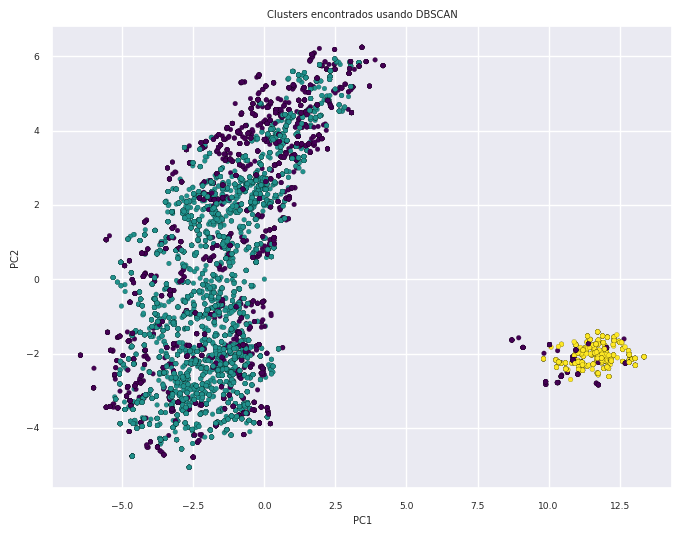

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['dbscan_cluster'], cmap='viridis', s=12, edgecolors= 'black', linewidths=0.1)
plt.title("Clusters encontrados usando DBSCAN")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

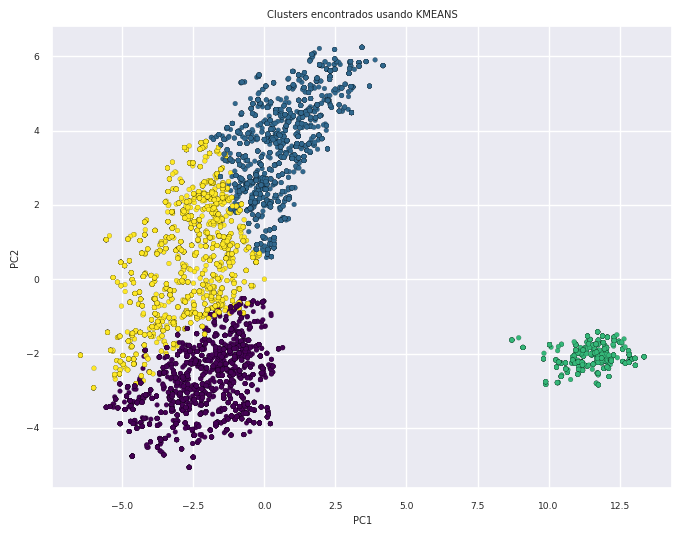

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['kmeans_cluster'], cmap='viridis', s=12, edgecolors= 'black', linewidths=0.1)
plt.title("Clusters encontrados usando KMEANS")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

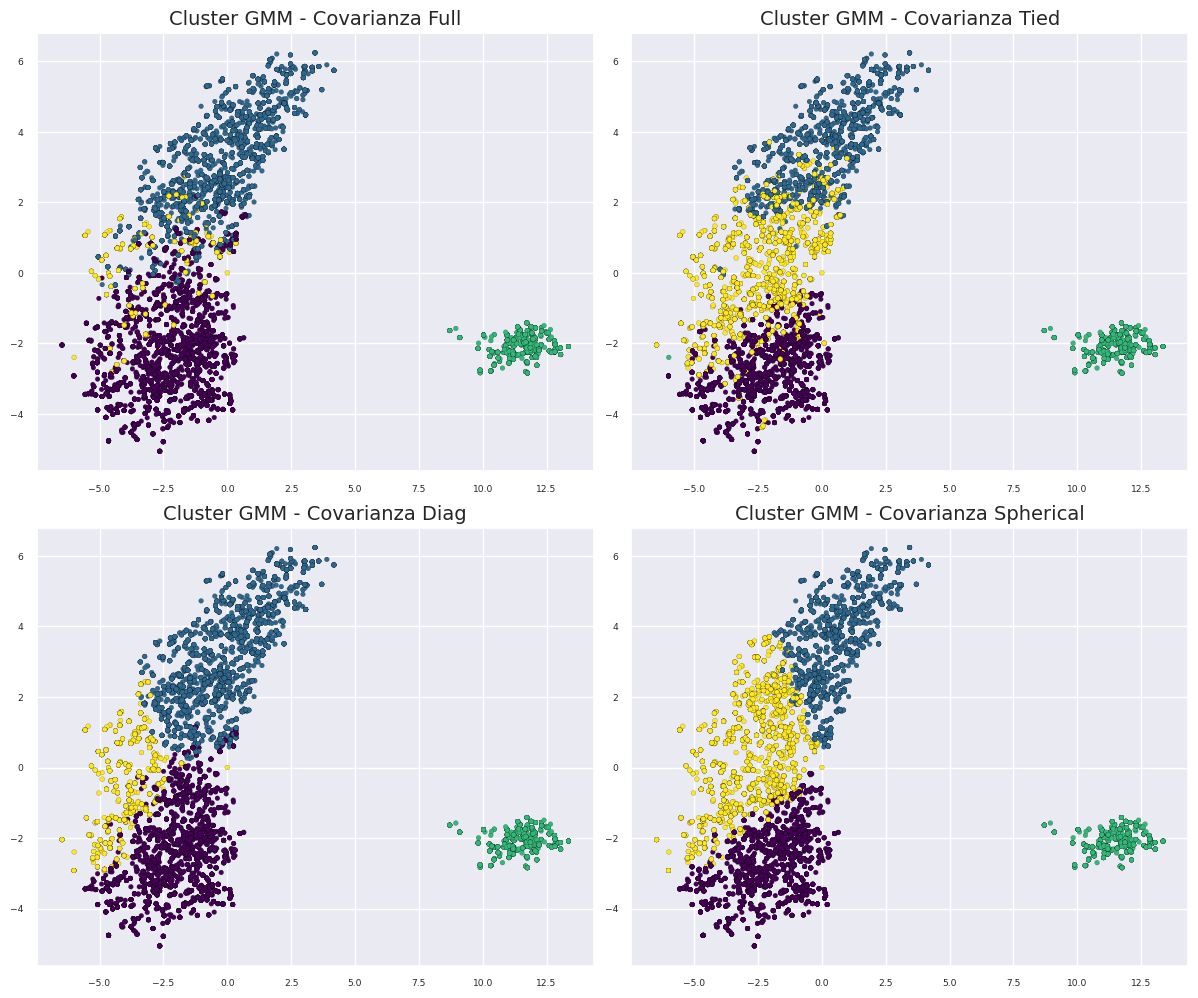

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar la fuente
sns.set(font_scale=0.6)

# Crear una matriz de subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Graficar en el primer subplot y agregar título
scatter1 = axes[0, 0].scatter(pca_data[:, 0], pca_data[:, 1], c=data['gmm_cluster_full'], cmap='viridis', s=12, edgecolors='black', linewidths=0.1)
axes[0, 0].set_title('Cluster GMM - Covarianza Full', fontsize=14)

# Graficar en el segundo subplot y agregar título
scatter2 = axes[0, 1].scatter(pca_data[:, 0], pca_data[:, 1], c=data['gmm_cluster_tied'], cmap='viridis', s=12, edgecolors='black', linewidths=0.1)
axes[0, 1].set_title('Cluster GMM - Covarianza Tied', fontsize=14)

# Graficar en el tercer subplot y agregar título
scatter3 = axes[1, 0].scatter(pca_data[:, 0], pca_data[:, 1], c=data['gmm_cluster_diag'], cmap='viridis', s=12, edgecolors='black', linewidths=0.1)
axes[1, 0].set_title('Cluster GMM - Covarianza Diag', fontsize=14)

# Graficar en el cuarto subplot y agregar título
scatter4 = axes[1, 1].scatter(pca_data[:, 0], pca_data[:, 1], c=data['gmm_cluster_spherical'], cmap='viridis', s=12, edgecolors='black', linewidths=0.1)
axes[1, 1].set_title('Cluster GMM - Covarianza Spherical', fontsize=14)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


---

*Los clusters encontrados utilizando Kmeans y GMM con covarianza 'spherical' son iguales porque Kmeans es un tipo específico de mezcla de gausianas*

*Los clusters encontrados utilizando GMM con covarianza 'tied' son los que consideramos mejores ya que se asemejan más a cómo se entremezlca el cluster amarillo del medio con el azul y violeta a lo que vemos que sucede en la realidad cuando comparamos variables de jugadoras según la categoría de posición que ocupan en el campo de juego*

---

In [39]:
for cluster_id in data['gmm_cluster_full'].unique():
    cluster_data = data[data['gmm_cluster_full'] == cluster_id]
    print(f"Cluster GMM {cluster_id} - Tamaño: {len(cluster_data)}")
for cluster_id in data['gmm_cluster_tied'].unique():
    cluster_data = data[data['gmm_cluster_tied'] == cluster_id]
    print(f"Cluster GMM {cluster_id} - Tamaño: {len(cluster_data)}")
for cluster_id in data['gmm_cluster_diag'].unique():
    cluster_data = data[data['gmm_cluster_diag'] == cluster_id]
    print(f"Cluster GMM {cluster_id} - Tamaño: {len(cluster_data)}")
for cluster_id in data['gmm_cluster_spherical'].unique():
    cluster_data = data[data['gmm_cluster_spherical'] == cluster_id]
    print(f"Cluster GMM {cluster_id} - Tamaño: {len(cluster_data)}")

Cluster GMM 0 - Tamaño: 3615
Cluster GMM 1 - Tamaño: 3019
Cluster GMM 3 - Tamaño: 517
Cluster GMM 2 - Tamaño: 897
Cluster GMM 0 - Tamaño: 2430
Cluster GMM 1 - Tamaño: 2277
Cluster GMM 3 - Tamaño: 2443
Cluster GMM 2 - Tamaño: 898
Cluster GMM 0 - Tamaño: 3124
Cluster GMM 1 - Tamaño: 3180
Cluster GMM 3 - Tamaño: 847
Cluster GMM 2 - Tamaño: 897
Cluster GMM 0 - Tamaño: 2627
Cluster GMM 3 - Tamaño: 2382
Cluster GMM 2 - Tamaño: 897
Cluster GMM 1 - Tamaño: 2142
